# Capstone Project 2 

## Machine Learning - Analyzing Telco Customer Churn (Supervised Learning Models)

To: Magnimind Academy

From: Sammi C

Date of Submission: 27.12.2022

## User Churn Prediction

### Introduction
New customer acquisitions will be more costly than retaining existing ones. Therefore, analyzing and predicting customer churn is critical for every corporation to keep customers effectively.

For this reason, by developing models to analyze and predict, customers are more likely to drop the service in the future. Based on the data-driven results, corporations could take action to prevent/ reduce user churn accordingly.


### Project Description / Problem
This project is a very common business problem: analyzing customer churn.

In this project, using supervised learning models to:

1. Identify cell phone service customers who are more likely to stop using the service in the future. 
2. Create a model that can predict if a certain customer will drop the service. 
3. Analyze the top factors that influence user retention to guide the company prevent user churn. 

The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually.


### Dataset

Dataset Source provided by Magnimind Academy:
https://drive.google.com/file/d/10viPq8FGkiYaUgAet8QW2RzV6YtLki1i/view?usp=share_link

### Columns Description
The original data source comes without column description. In order to analyzing and have better understanding of data, the column description (in below) will be inferred by me.

- #### state: 
the region(state) of customer's living area

- #### account_length: 
the length(days) of customer holds their telco account

- #### area_code: 
post code of region(state) of customer's living area

- #### phone_number: 
unique ID that identifies each customer

#####  --------------------------------------------------------------------------------------------------

- #### intl_plan: 
Indicates if the customer subscribes international plan
0 = No; 1 = Yes

- #### voice_mail_plan: 
Indicates if the customer subscribes voice mail plan
0 = No; 1 = Yes

- #### number_vmail_messages: 
numbers of voice mail that customer have got (only for who have subscribed voice mail plan)

#####  --------------------------------------------------------------------------------------------------

- #### total_day_minutes:
total usage of service(phone calls)/day in daytime counts by minutes

- #### total_day_calls:
total usage of service(phone calls)/day in daytime counts by times

- #### total_day_charge:
total charges of service(phone calls)/day in daytime counts by USD

#####  --------------------------------------------------------------------------------------------------

- #### total_eve_minutes:
total usage of service(phone calls)/day in evening counts by minutes

- #### total_eve_calls:
total usage of service(phone calls)/day in evening counts by times

- #### total_eve_charge:
total charges of service(phone calls)/day in evening counts by USD

#####  --------------------------------------------------------------------------------------------------

- #### total_night_minutes:
total usage of service(phone calls)/day in night counts by minutes

- #### total_night_calls:
total usage of service(phone calls)/day in night counts by times

- #### total_night_charge:
total charges of service(phone calls)/day in night counts by USD

#####  --------------------------------------------------------------------------------------------------

- #### total_intl_minutes:
total usage of international service(phone calls)/day counts by minutes

- #### total_intl_calls:
total usage of international service(phone calls)/day counts by times

- #### total_intl_charge:
total charges international service(phone calls)/day counts by USD

#####  --------------------------------------------------------------------------------------------------

- #### number_customer_service_calls:
customer service calls / day


- #### churned:
  Yes = the customer left the company.
  
  No = the customer remained with the company. 

  Directly related to Churn Value. 
  0 = False; 1 = True

### Methods
#### Supervised Learning Models

Types of Supervised Learning Techniques: 
1. Classification

output is having defined labels(discrete value)

- Support Vector Machines (SVM)
- Decision Trees
- K-Nearest Neighbor (KNN)
- Random Forest


2. Regression  

output is having continuous value.

- Linear Regression
- Logistical Regression
- Polynomial Regression

In [1]:
# import necessary libraries

# EDA & Visualization
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import scipy.stats as stats

# ML - Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Importng dataset

In [2]:
# import dataset and read by pandas 
# create a copy, keep the original dateset safe
path = 'D:/online course/Magnimind academy/Full Data Bootcamp/CAPSTONE PROJECT-2/churn.csv'
user_churn = pd.read_csv(path)
df = user_churn.copy() 

### Reading dataset

In [3]:
# check data format
df.head(5)

state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103                 ?   
2             41.38  ...              110              10.3   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

  total_night_minutes  total_night_calls  total_night_charge  \
0               244.7                 91               11.01   
1               254.4                103               11.45   
2               162.6                104                7.32   
3               196.9                 89                8.86   
4               186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churned  
0                              1   False.  
1                              1   False.  
2                              0   False.  
3                              2   False.  
4                              3   False.  

[5 rows x 21 columns]

In [4]:
df.tail(5)

state  account_length  area_code phone_number intl_plan voice_mail_plan  \
4995    HI              50        408     365-8751        no             yes   
4996    WV             152        415     334-9736        no              no   
4997    DC              61        415     333-6861        no              no   
4998    DC             109        510     394-2206        no              no   
4999    VT              86        415     373-8058        no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4995                     40              235.7              127   
4996                      0              184.2               90   
4997                      0              140.6               89   
4998                      0              188.8               67   
4999                     34              129.4              102   

      total_day_charge  ...  total_eve_calls  total_eve_charge  \
4995             40.07  ...              126             18.96   
4996             31.31  ...               73             21.83   
4997             23.90  ...              128             14.69   
4998             32.10  ...               92             14.59   
4999             22.00  ...              104              22.7   

     total_night_minutes  total_night_calls  total_night_charge  \
4995               297.5                116               13.39   
4996               213.6                113                9.61   
4997               212.4                 97                9.56   
4998               224.4                 89               10.10   
4999               154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4995                 9.9                 5               2.67   
4996                14.7                 2               3.97   
4997                13.6                 4               3.67   
4998                 8.5                 6               2.30   
4999                 9.3                16               2.51   

      number_customer_service_calls  churned  
4995                              2   False.  
4996                              3    True.  
4997                              1   False.  
4998                              0   False.  
4999                              0   False.  

[5 rows x 21 columns]

### Data Wrangling/ Data Cleaning & EDA(Exploratory Data Analysis)

In [5]:
# check duplicate
df.duplicated().sum()

0

In [6]:
# check dimensions
df.ndim

2

In [7]:
# check how many columns & columns
df.shape

(5000, 21)

In [8]:
# check data index
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [9]:
# check how many unique samples in eaxh columns
df.nunique()

state                              51
account_length                    218
area_code                           3
phone_number                     5000
intl_plan                           2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1660
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churned                             2
dtype: int64

In [10]:
# calculating some statistical data information
df.describe().T

count        mean        std    min      25%  \
account_length                 5000.0  100.258600  39.694560    1.0   73.000   
area_code                      5000.0  436.911400  42.209182  408.0  408.000   
number_vmail_messages          5000.0    7.755200  13.546393    0.0    0.000   
total_day_minutes              5000.0  180.288900  53.894699    0.0  143.700   
total_day_calls                5000.0  100.029400  19.831197    0.0   87.000   
total_day_charge               5000.0   30.649668   9.162069    0.0   24.430   
total_eve_minutes              5000.0  200.636560  50.551309    0.0  166.375   
total_eve_calls                5000.0  100.191000  19.826496    0.0   87.000   
total_night_minutes            5000.0  200.391620  50.527789    0.0  166.900   
total_night_calls              5000.0   99.919200  19.958686    0.0   87.000   
total_night_charge             5000.0    9.017732   2.273763    0.0    7.510   
total_intl_minutes             5000.0   10.261780   2.761396    0.0    8.500   
total_intl_calls               5000.0    4.435200   2.456788    0.0    3.000   
total_intl_charge              4999.0    2.771146   0.745580    0.0    2.300   
number_customer_service_calls  5000.0    1.570400   1.306363    0.0    1.000   

                                  50%     75%     max  
account_length                 100.00  127.00  243.00  
area_code                      415.00  415.00  510.00  
number_vmail_messages            0.00   17.00   52.00  
total_day_minutes              180.10  216.20  351.50  
total_day_calls                100.00  113.00  165.00  
total_day_charge                30.62   36.75   59.76  
total_eve_minutes              201.00  234.10  363.70  
total_eve_calls                100.00  114.00  170.00  
total_night_minutes            200.40  234.70  395.00  
total_night_calls              100.00  113.00  175.00  
total_night_charge               9.02   10.56   17.77  
total_intl_minutes              10.30   12.00   20.00  
total_intl_calls                 4.00    6.00   20.00  
total_intl_charge                2.78    3.24    5.40  
number_customer_service_calls    1.00    2.00    9.00

In [11]:
# check null numbers & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

In [12]:
# check for total null values by columns
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

In [13]:
# show the column with null value (NaN)
df.loc[df.isna().any(1)]

state  account_length  area_code phone_number intl_plan voice_mail_plan  \
9    WV             141        415     330-8173       yes             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
9                     37              258.6               84   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
9             43.96  ...              111             18.87   

  total_night_minutes  total_night_calls  total_night_charge  \
9               326.4                 97               14.69   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
9                11.2                 5                NaN   

   number_customer_service_calls  churned  
9                              0   False.  

[1 rows x 21 columns]

In [14]:
# check null values
df.isnull().any()

state                            False
account_length                   False
area_code                        False
phone_number                     False
intl_plan                        False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                 True
number_customer_service_calls    False
churned                          False
dtype: bool

In [15]:
# check datatypes of all columns
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                  object
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object

In [16]:
# drop useless columns in EDA
df = df.drop(columns = ['phone_number','area_code'], axis = 1)

In [17]:
# make sure all columns without any empty spaces or punctuations
# remove empty spaces
df.columns = df.columns.str.strip()

# remove punctuations from [churned] columns
df['churned']  = df['churned'].str.replace('[^\w\s]', '')

C:\Users\sammi\AppData\Local\Temp/ipykernel_4576/2784195345.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['churned']  = df['churned'].str.replace('[^\w\s]', '')


In [18]:
# the [total_eve_charge] datatype is object, so check is there has any punctuations
print(string.punctuation)
df['total_eve_charge'].isin(["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]).value_counts()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


False    4995
True        5
Name: total_eve_charge, dtype: int64

In [19]:
# check which columns needs to change values
df['total_eve_charge'].loc[df.isin(["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]).any(1)]

1     ?
5     ?
20    ?
34    ?
50    ?
Name: total_eve_charge, dtype: object

In [20]:
# change the '?' mark to numerical type
df.loc[[1, 5, 20, 34, 50],['total_eve_charge']] = df['total_eve_charge'].replace('?', 0)

In [21]:
# change the datatype to fulfilled the missing values'?'
df = df.astype({ 'total_eve_charge' : 'float'})

In [22]:
# fulfilled the missing values'?'  with 'mean'
df.loc[[1, 5, 20, 34, 50],['total_eve_charge']] = df['total_eve_charge'].mean()

In [23]:
# round the mean value of [total_eve_charge] with 2 decimal
df['total_eve_charge'] = df['total_eve_charge'].round(2)

In [24]:
# fulfilled the null value with 'mean'
df = df.fillna(value = df['total_intl_charge'].mean())

In [25]:
# check the categorical and numerical columns in dataset
# categorical data
cat_col=[i for i in df.columns if df[i].dtype == 'O']
# numarical data
num_col=[i for i in df.columns if df[i].dtype != 'O']

In [26]:
# categorical data
df[cat_col].head()

state intl_plan voice_mail_plan churned
0    KS        no             yes   False
1    OH        no             yes   False
2    NJ        no              no   False
3    OH       yes              no   False
4    OK       yes              no   False

In [27]:
# numarical data
df[num_col].head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             17.04   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  
0                              1  
1                              1  
2                              0  
3                              2  
4                              3

In [28]:
# add columns - sum of total_mins, total_calls, total_charge
df['total_mins'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

### Data Visualization

C:\Users\sammi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammi\anaconda3\lib\si

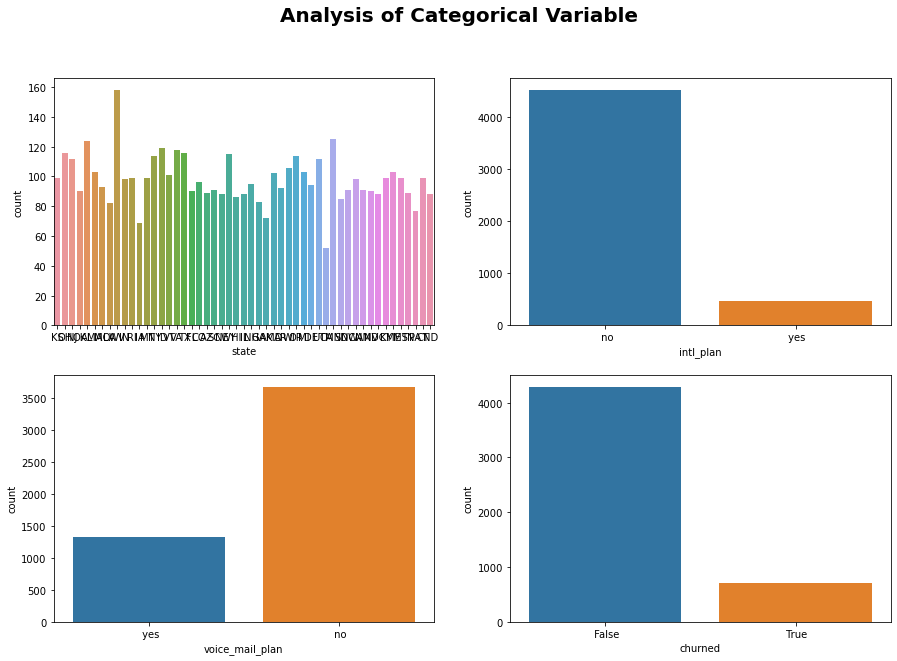

In [29]:
# Categorical Variable
plt.figure(figsize = (15, 10))
plt.suptitle('Analysis of Categorical Variable', fontsize = 20, fontweight = 'bold')
cat_col = [i for i in df.columns if df[i].dtype == 'O']

for i in range(0, len(cat_col)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(df[cat_col[i]])
    plt.xlabel(cat_col[i])

C:\Users\sammi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sammi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sammi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

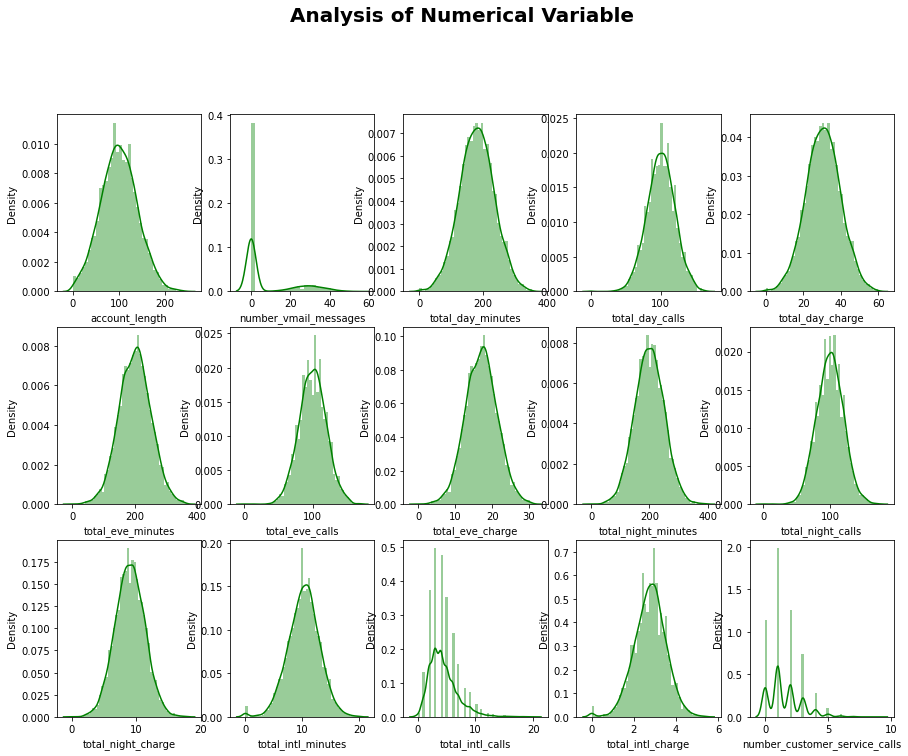

In [30]:
# Numerical Variable
plt.figure(figsize = (15, 15))
plt.suptitle('Analysis of Numerical Variable', fontsize=20, fontweight='bold')
for i in range (0, len(num_col)):
    plt.subplot(4, 5, i + 1)
    sns.distplot(df[num_col[i]], color = 'g')
    plt.xlabel(num_col[i], size = 10)

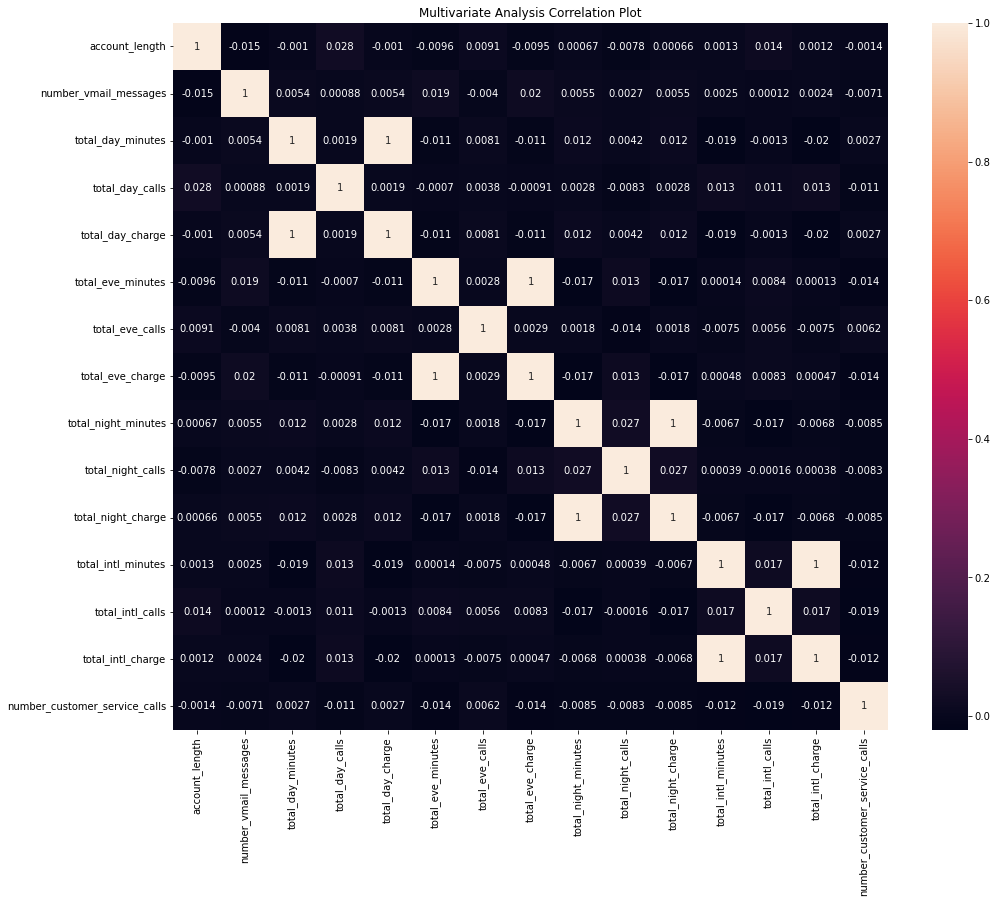

In [31]:
# Correlation Plot (Numerical Variable)
plt.figure(figsize = (16, 13))
plt.title('Multivariate Analysis Correlation Plot')
sns.heatmap(df[num_col].corr(), annot = True)
plt.show()

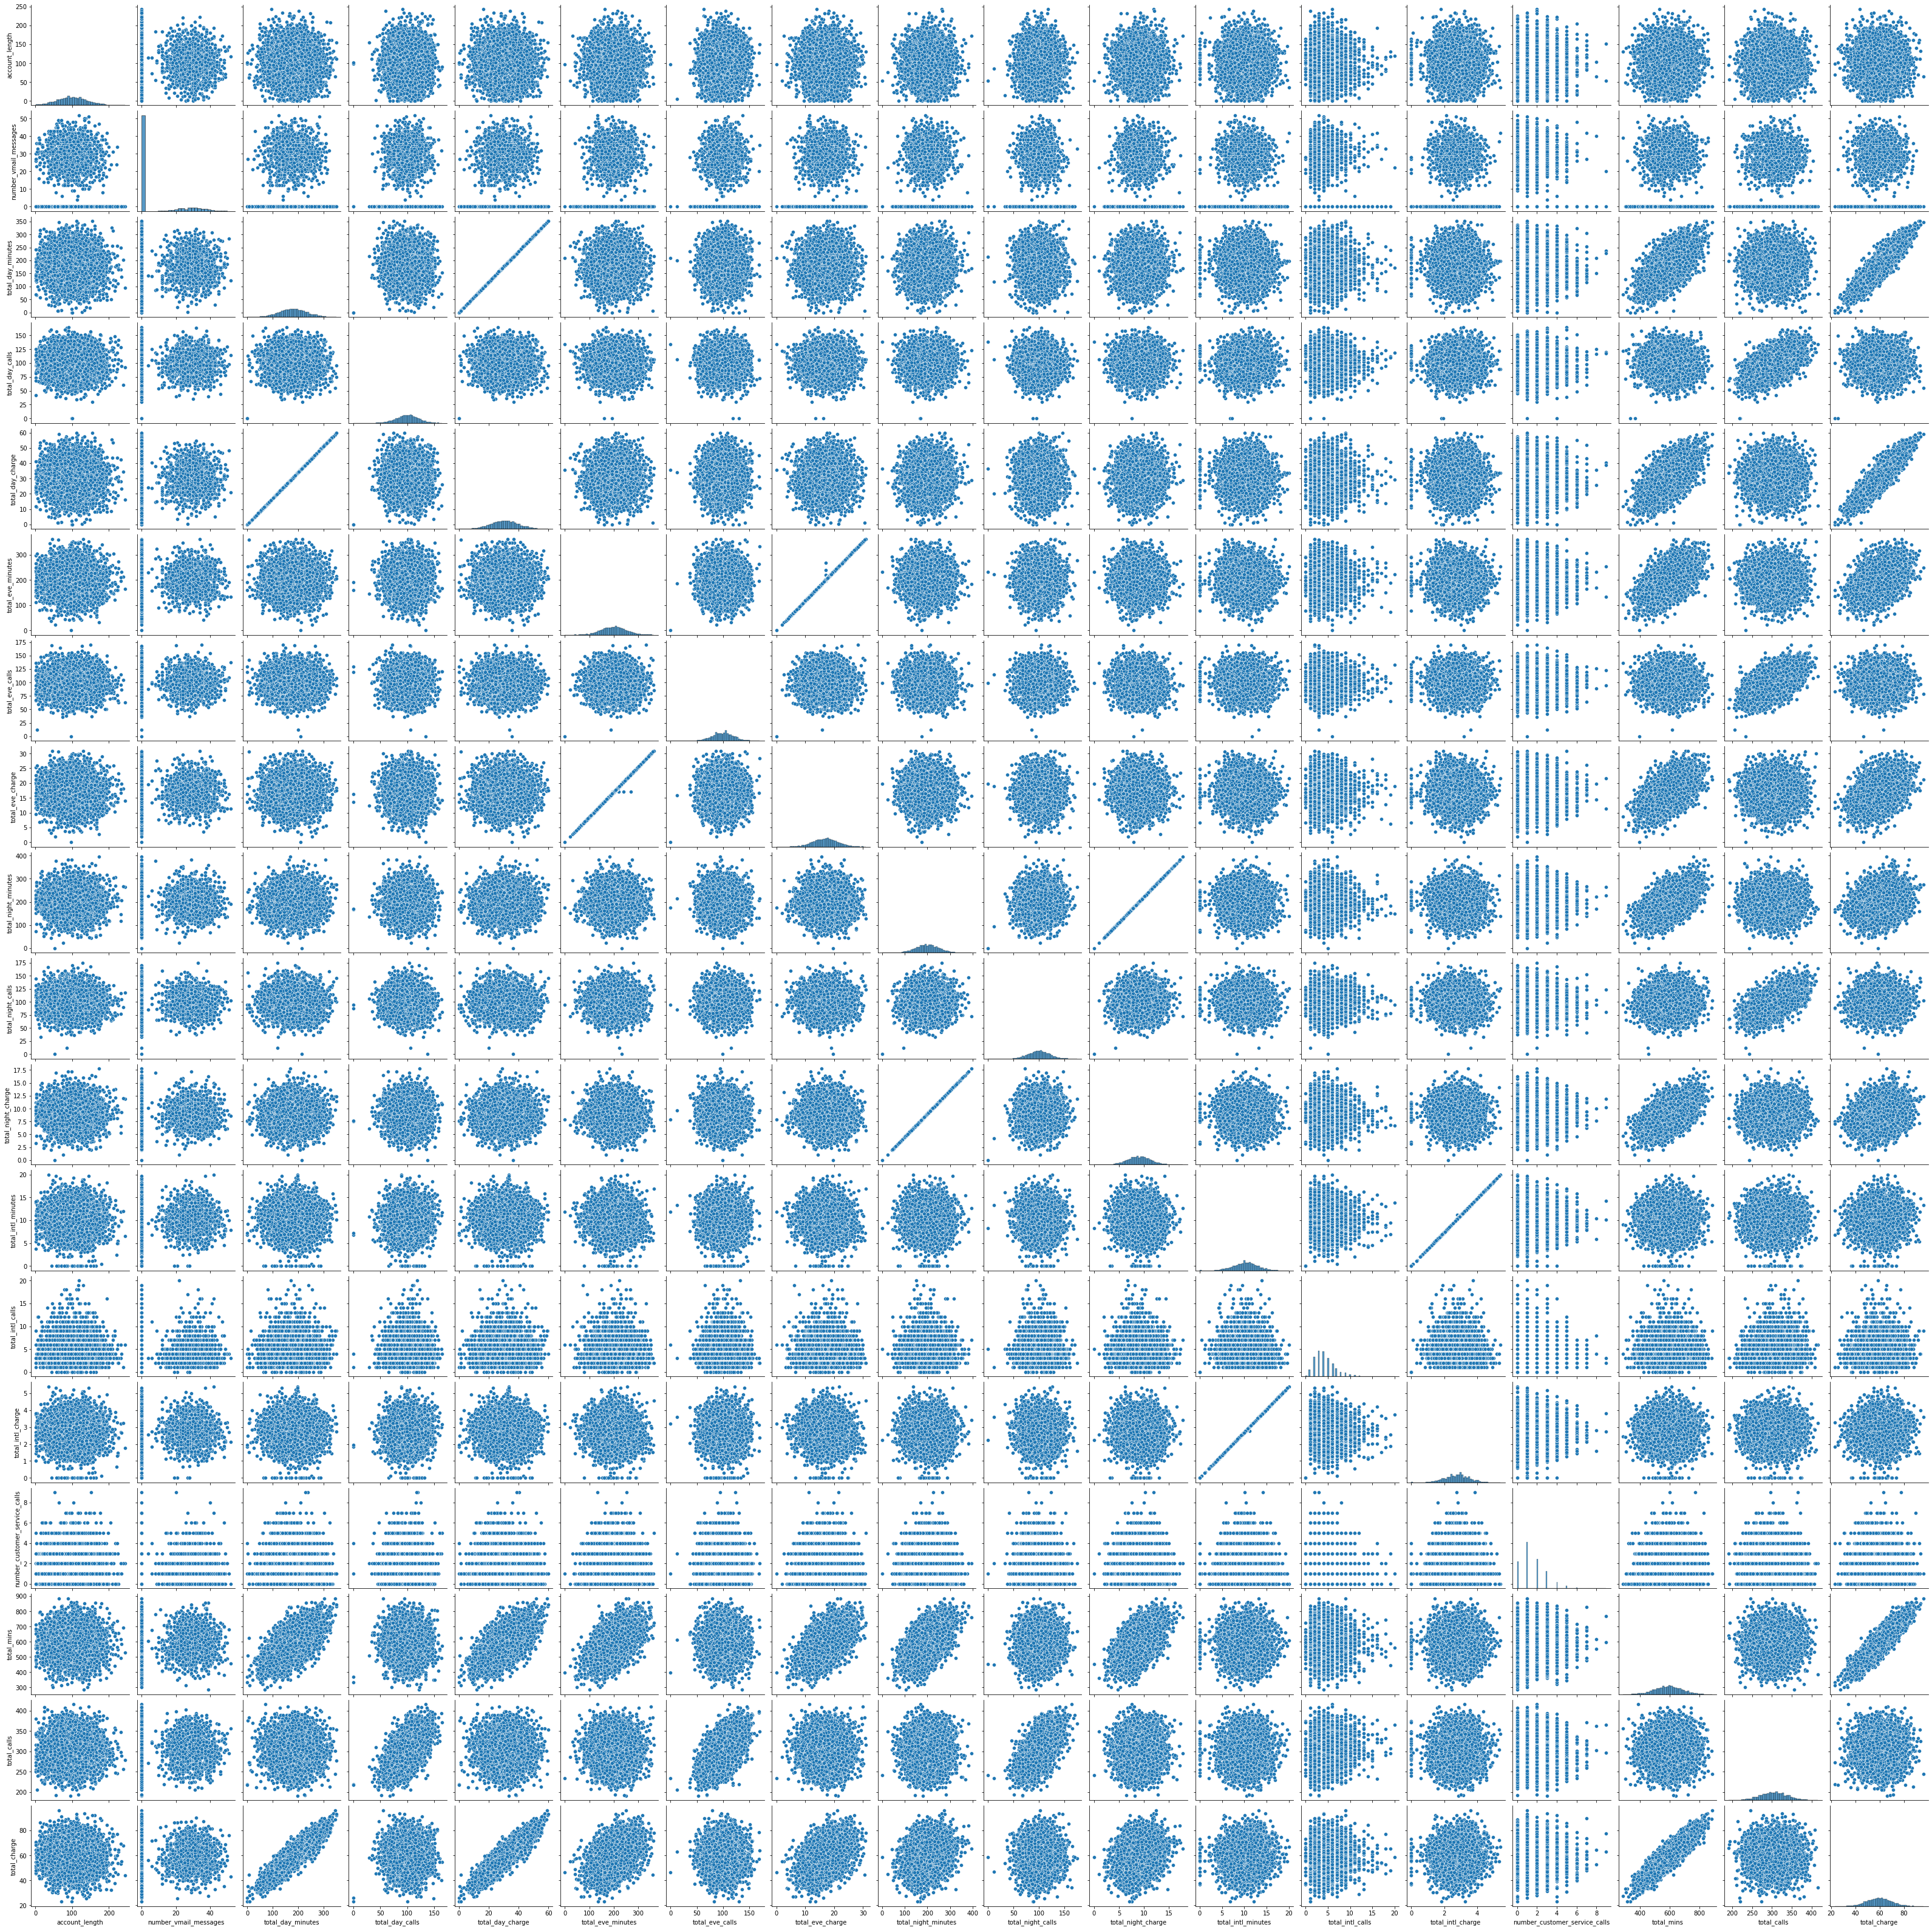

In [32]:
# check the distributions of each feature
sns.pairplot(df)

In [33]:
# Average by Class - churned
df.groupby(['churned']).mean().T

churned                             False        True
account_length                  99.917074  102.332390
number_vmail_messages            8.291870    4.496464
total_day_minutes              175.746564  207.870580
total_day_calls                 99.899604  100.817539
total_day_charge                29.877494   35.338416
total_eve_minutes              198.805031  211.757850
total_eve_calls                100.241556   99.884017
total_eve_charge                16.896313   17.999562
total_night_minutes            199.455113  206.078218
total_night_calls               99.975775   99.575672
total_night_charge               8.975593    9.273607
total_intl_minutes              10.190869   10.692362
total_intl_calls                 4.481947    4.151344
total_intl_charge                2.751997    2.887426
number_customer_service_calls    1.457722    2.254597
total_mins                     584.197577  636.399010
total_calls                    304.598882  304.428571
total_charge                    58.501396   65.499010

In [34]:
# sum of the size of churned (true and false)
sum_churned = df['churned'].value_counts()
sum_churned

 False    4293
 True      707
Name: churned, dtype: int64

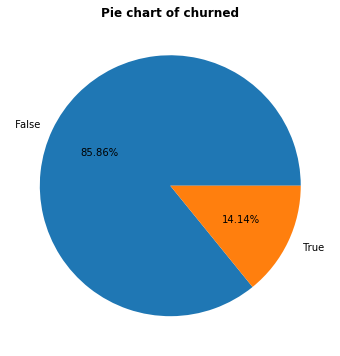

In [35]:
# pie chart of churned - Target
plt.figure(figsize=(8,6))
plt.pie(df.churned.value_counts(), autopct='%.2f%%', labels = df.churned.unique())
plt.title('Pie chart of churned', fontweight = 'bold')
plt.show()

<AxesSubplot:title={'center':'Realtion Between Churned & Intl Plan'}, xlabel='intl_plan', ylabel='Count'>

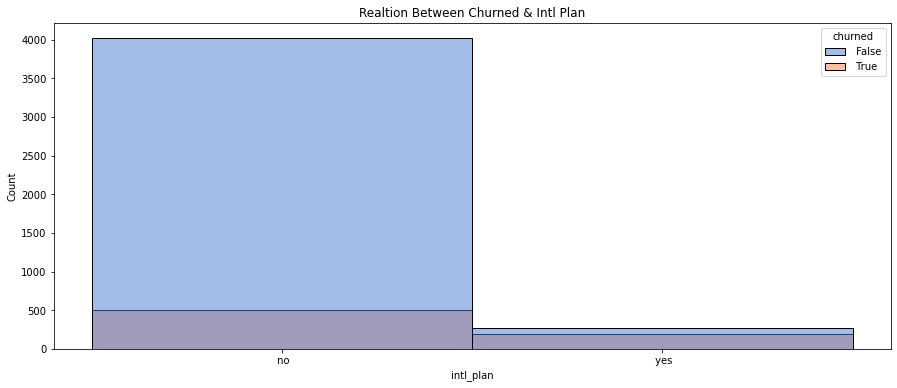

In [36]:
# Realtion Between Churned & Intl Plan
plt.figure(figsize=(15,6))
plt.title('Realtion Between Churned & Intl Plan')
sns.histplot(data= df, hue = 'churned', x= 'intl_plan', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Voice Mail Plan'}, xlabel='voice_mail_plan', ylabel='Count'>

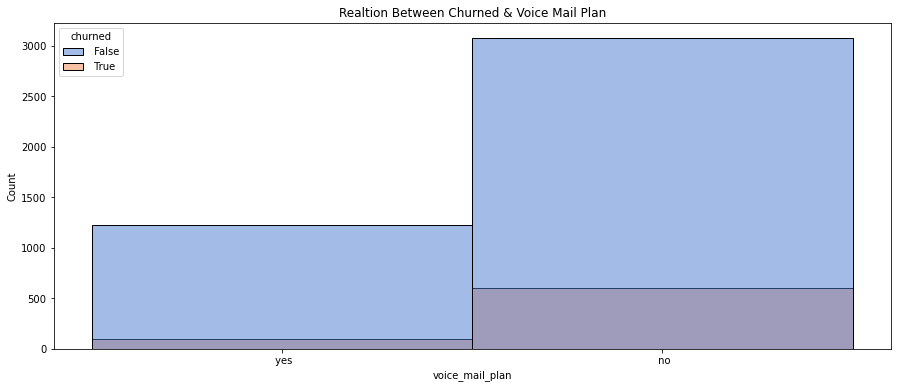

In [37]:
# Realtion Between Churned & Voice Mail Plan
plt.figure(figsize=(15,6))
plt.title('Realtion Between Churned & Voice Mail Plan')
sns.histplot(data= df, hue = 'churned', x= 'voice_mail_plan', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & State'}, xlabel='state', ylabel='Count'>

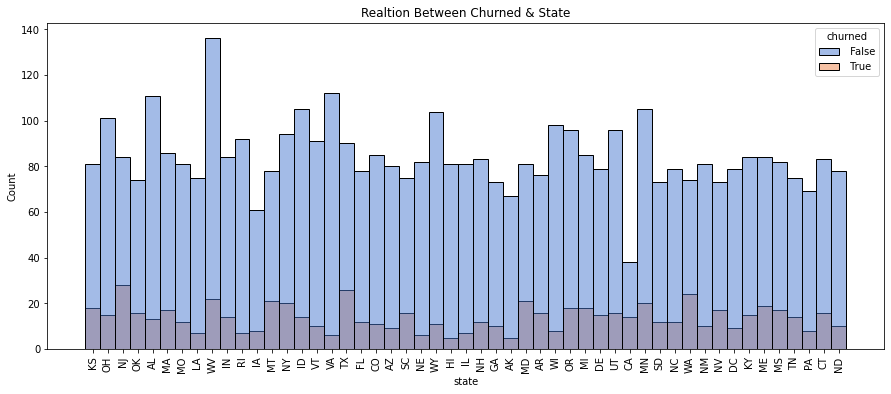

In [38]:
# Realtion Between Churned & State
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & State')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'state', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Calls'}, xlabel='total_calls', ylabel='Count'>

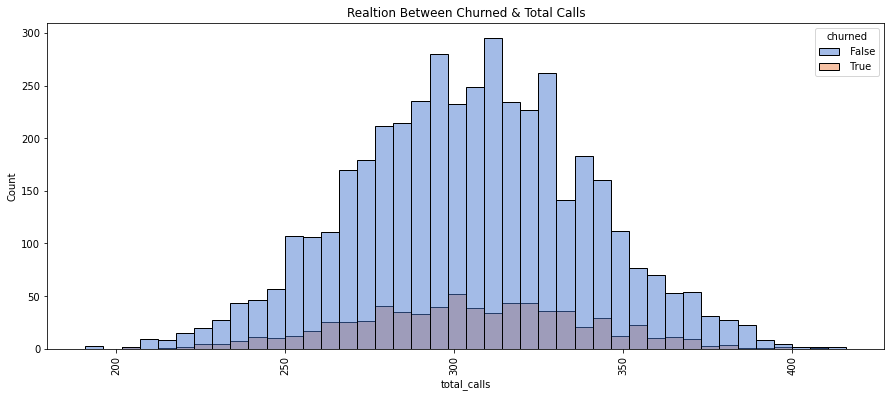

In [39]:
# Realtion Between Churned & Total Calls 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Total Calls')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'total_calls', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Charge'}, xlabel='total_charge', ylabel='Count'>

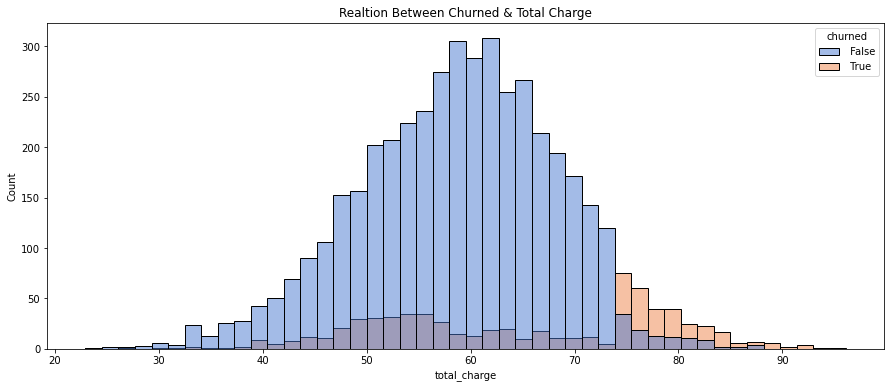

In [40]:
# Realtion Between Churned & Total Charge
plt.figure(figsize=(15,6))
plt.title('Realtion Between Churned & Total Charge')
sns.histplot(data= df, hue = 'churned', x= 'total_charge', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Mins'}, xlabel='total_mins', ylabel='Count'>

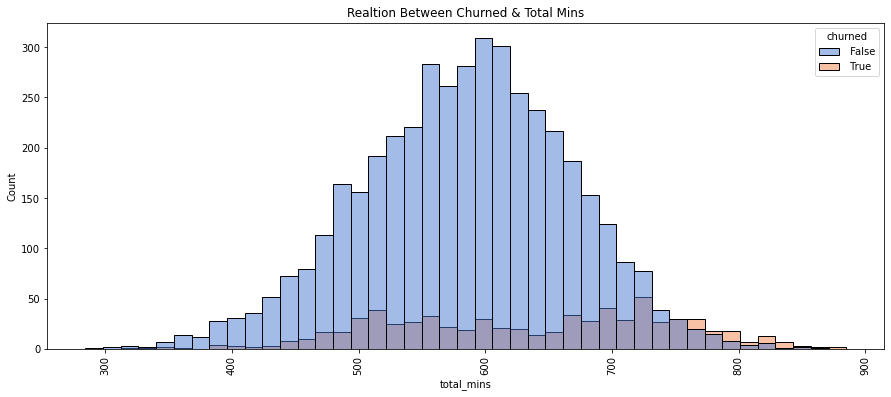

In [41]:
# Realtion Between Churned & Total Mins 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Total Mins')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'total_mins', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Account Length'}, xlabel='account_length', ylabel='Count'>

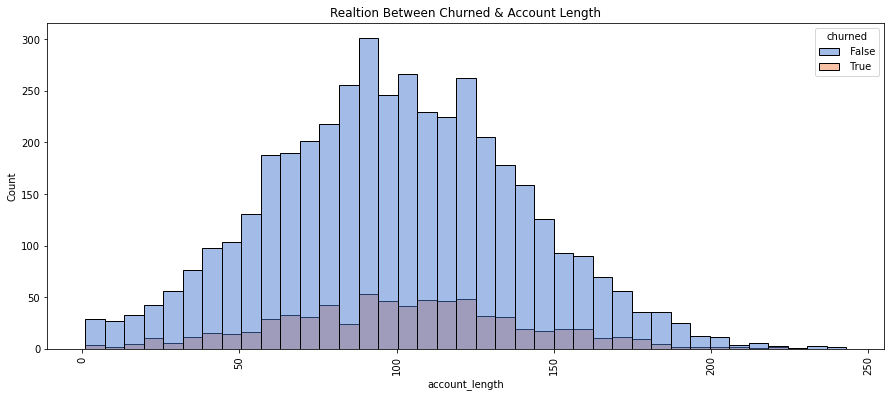

In [42]:
# Realtion Between Churned & Account Length 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Account Length')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'account_length', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Day Charge'}, xlabel='total_day_charge', ylabel='Count'>

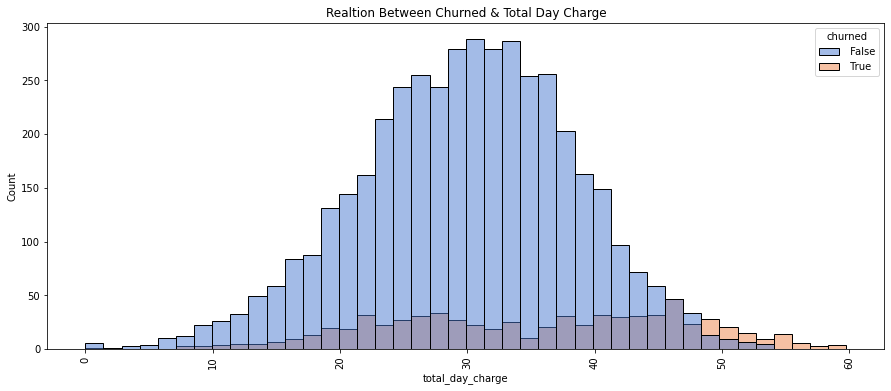

In [43]:
# Realtion Between Churned & Total Day Charge
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Total Day Charge')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'total_day_charge', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Evening Charge'}, xlabel='total_eve_charge', ylabel='Count'>

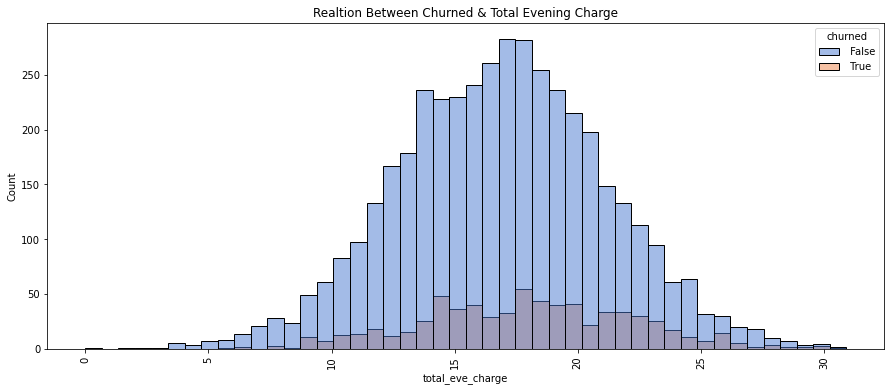

In [44]:
# Realtion Between Churned & Total Evening Charge 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Total Evening Charge')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'total_eve_charge', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Total Night Charge'}, xlabel='total_night_charge', ylabel='Count'>

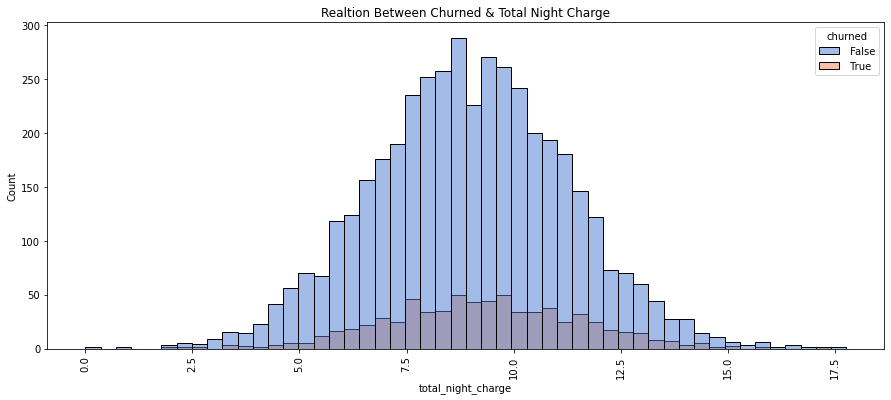

In [45]:
# Realtion Between Churned & Total Night Charge 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Total Night Charge')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'total_night_charge', palette = "muted")

<AxesSubplot:title={'center':'Realtion Between Churned & Number Customer Service Calls'}, xlabel='number_customer_service_calls', ylabel='Count'>

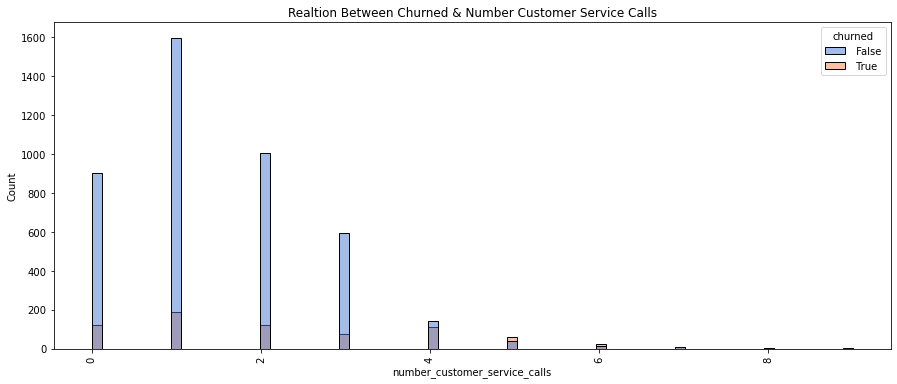

In [46]:
# Realtion Between Churned & Number Customer Service Calls 
plt.figure(figsize=(15, 6))
plt.title('Realtion Between Churned & Number Customer Service Calls')
plt.xticks(size = 10, rotation = 'vertical')
sns.histplot(data= df, hue = 'churned', x= 'number_customer_service_calls', palette = "muted")

### Converting Categorical data into 0 and 1

In [47]:
# ategorical data
data_frame = pd.DataFrame(df, columns=['intl_plan', 'voice_mail_plan', 'churned'])
print(data_frame)

     intl_plan voice_mail_plan churned
0           no             yes   False
1           no             yes   False
2           no              no   False
3          yes              no   False
4          yes              no   False
...        ...             ...     ...
4995        no             yes   False
4996        no              no    True
4997        no              no   False
4998        no              no   False
4999        no             yes   False

[5000 rows x 3 columns]


In [48]:
# to binary data
df_1 = pd.get_dummies(data_frame, columns = ['intl_plan', 'voice_mail_plan', 'churned'])
df_1.head()

intl_plan_ no  intl_plan_ yes  voice_mail_plan_ no  voice_mail_plan_ yes  \
0              1               0                    0                     1   
1              1               0                    0                     1   
2              1               0                    1                     0   
3              0               1                    1                     0   
4              0               1                    1                     0   

   churned_ False  churned_ True  
0               1              0  
1               1              0  
2               1              0  
3               1              0  
4               1              0

In [49]:
# binary data is Concatenated into Dataframe
df_2 = pd.concat((df_1, data_frame), axis = 1)
df_2.head()

intl_plan_ no  intl_plan_ yes  voice_mail_plan_ no  voice_mail_plan_ yes  \
0              1               0                    0                     1   
1              1               0                    0                     1   
2              1               0                    1                     0   
3              0               1                    1                     0   
4              0               1                    1                     0   

   churned_ False  churned_ True intl_plan voice_mail_plan churned  
0               1              0        no             yes   False  
1               1              0        no             yes   False  
2               1              0        no              no   False  
3               1              0       yes              no   False  
4               1              0       yes              no   False

In [50]:
# drop Categorical columns
df_2 = df_2.drop(['intl_plan', 'voice_mail_plan', 'churned'], axis=1)

In [51]:
# False = 0, no = 0 and True = 1, yes = 1
df_2 = df_2.drop(['churned_ False', 'intl_plan_ no', 'voice_mail_plan_ no'], axis = 1)

In [52]:
# False = 0, True = 1
# no = 0, yes = 1
df = pd.concat((df_2, df), axis = 1)
df

intl_plan_ yes  voice_mail_plan_ yes  churned_ True state  \
0                  0                     1              0    KS   
1                  0                     1              0    OH   
2                  0                     0              0    NJ   
3                  1                     0              0    OH   
4                  1                     0              0    OK   
...              ...                   ...            ...   ...   
4995               0                     1              0    HI   
4996               0                     0              1    WV   
4997               0                     0              0    DC   
4998               0                     0              0    DC   
4999               0                     1              0    VT   

      account_length intl_plan voice_mail_plan  number_vmail_messages  \
0                128        no             yes                     25   
1                107        no             yes                     26   
2                137        no              no                      0   
3                 84       yes              no                      0   
4                 75       yes              no                      0   
...              ...       ...             ...                    ...   
4995              50        no             yes                     40   
4996             152        no              no                      0   
4997              61        no              no                      0   
4998             109        no              no                      0   
4999              86        no             yes                     34   

      total_day_minutes  total_day_calls  ...  total_night_calls  \
0                 265.1              110  ...                 91   
1                 161.6              123  ...                103   
2                 243.4              114  ...                104   
3                 299.4               71  ...                 89   
4                 166.7              113  ...                121   
...                 ...              ...  ...                ...   
4995              235.7              127  ...                116   
4996              184.2               90  ...                113   
4997              140.6               89  ...                 97   
4998              188.8               67  ...                 89   
4999              129.4              102  ...                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
4995               13.39                 9.9                 5   
4996                9.61                14.7                 2   
4997                9.56                13.6                 4   
4998               10.10                 8.5                 6   
4999                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls  churned  total_mins  \
0                  2.70                              1    False       717.2   
1                  3.70                              1    False       625.2   
2                  3.29                              0    False       539.4   
3                  1.78                              2    False       564.8   
4                  2.73                              3    False       512.0   
...                 ...                            ...      ...         ...   
4995               2.67                              2    False       766.1   
4996               3.97                              3     True       669.3   
499

In [53]:
# rename columns
df = df.rename(columns={'intl_plan_ yes': "int_plan",
                        'voice_mail_plan_ yes' :'vmail_plan',
                        'churned_ True' : 'churn'})
df.head()

int_plan  vmail_plan  churn state  account_length intl_plan  \
0         0           1      0    KS             128        no   
1         0           1      0    OH             107        no   
2         0           0      0    NJ             137        no   
3         1           0      0    OH              84       yes   
4         1           0      0    OK              75       yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   ...  total_night_calls  total_night_charge  total_intl_minutes  \
0  ...                 91               11.01                10.0   
1  ...                103               11.45                13.7   
2  ...                104                7.32                12.2   
3  ...                 89                8.86                 6.6   
4  ...                121                8.41                10.1   

   total_intl_calls  total_intl_charge  number_customer_service_calls  \
0                 3               2.70                              1   
1                 3               3.70                              1   
2                 5               3.29                              0   
3                 7               1.78                              2   
4                 3               2.73                              3   

   churned  total_mins  total_calls  total_charge  
0    False       717.2          303         75.56  
1    False       625.2          332         59.66  
2    False       539.4          333         62.29  
3    False       564.8          255         66.80  
4    False       512.0          359         52.09  

[5 rows x 25 columns]

In [54]:
df = df.drop(['state', 'churned', 'voice_mail_plan', 'intl_plan'], axis = 1)
df.head()

int_plan  vmail_plan  churn  account_length  number_vmail_messages  \
0         0           1      0             128                     25   
1         0           1      0             107                     26   
2         0           0      0             137                      0   
3         1           0      0              84                      0   
4         1           0      0              75                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  ...  total_night_minutes  total_night_calls  \
0               99  ...                244.7                 91   
1              103  ...                254.4                103   
2              110  ...                162.6                104   
3               88  ...                196.9                 89   
4              122  ...                186.9                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  number_customer_service_calls  total_mins  total_calls  \
0               2.70                              1       717.2          303   
1               3.70                              1       625.2          332   
2               3.29                              0       539.4          333   
3               1.78                              2       564.8          255   
4               2.73                              3       512.0          359   

   total_charge  
0         75.56  
1         59.66  
2         62.29  
3         66.80  
4         52.09  

[5 rows x 21 columns]

# Supervised Learning - Classification

#### Here will use classification to predict the user churned because the churned value is discrete values (False/True, Yes/No -> 0, 1), you cannot be subdivided into parts 
(e.g. you can only count whole individuals/number, and cannot count 1.3 to indicate False/True, Yes/No).

In [55]:
# target
y = df.churn.values

# data
X = df.drop(['churn'], axis = 1)

In [56]:
# Split the data into training and testing data
# 20% of the data for testing and 80% for training

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [57]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model = rfc_model.fit(X_train, y_train)
pred_rfc = rfc_model.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mean_squared_error(y_test, pred_rfc))
print("Accuracy with Random Forest Classifier:", accuracy_score(y_test, pred_rfc))

Mean-squared error using Random Forest Classifier: 0.021
Accuracy with Random Forest Classifier: 0.979


In [58]:
# Support Vector Machines (SVM)
svc = SVC(kernel = "rbf")
svc = svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("Mean-squared error using SVM :", mean_squared_error(y_test, pred_svc))
print("Accuracy with SVM :",accuracy_score(y_test, pred_svc))

Mean-squared error using SVM : 0.141
Accuracy with SVM : 0.859


In [59]:
# Logistic Regression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mean_squared_error(y_test, pred_logreg))
print("Accuracy with Logistic Regression:", accuracy_score(y_test, pred_logreg))

Mean-squared error using Logistic Regression: 0.138
Accuracy with Logistic Regression: 0.862


C:\Users\sammi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Mean-squared error using KNeighborsClassifier:", mean_squared_error(y_test, pred_knn))
print("Accuracy with KNeighborsClassifier:", accuracy_score(y_test, pred_knn))

Mean-squared error using KNeighborsClassifier: 0.12
Accuracy with KNeighborsClassifier: 0.88


In [61]:
# Decision Trees
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print("Mean-squared error using Decision Tree:", mean_squared_error(y_test, pred_dtree))
print("Accuracy with Decision Tree:", accuracy_score(y_test, pred_dtree))

Mean-squared error using Decision Tree: 0.05
Accuracy with Decision Tree: 0.95


## Facts

#### Dataset information
- 5000 unique phone number from 51 states with 3 area code 


- 82.86% of customer remain with a corporation

- 14.14% of customer choose to leave


- Average of account length : approx. 100 days 

- Number customer service calls : approx. 1.57/day


#### In Daytime

- Average of total day minutes: approx. 180.28 /mins

- Average of total day calls: approx. 100.02 /day

- Average of total day charge: approx. 30.64 USD/ day


#### In Evening

- Average of total eve minutes: approx. 200.63 /mins

- Average of total eve calls: approx. 100.19 /day

- Average of total eve charge: approx. 17.05 USD/ day


#### At Night
- Average of total night minutes: approx. 200.39 /mins

- Average of total night calls: approx. 99.91 /day

- Average of total night charge: approx. 9.07 USD/ day


## Findings

- In the evening, even the usage of minutes more the daytime, the charges much less than the daytime


- the customer with 'intl_plan' have highly chance  choose to leave


- the customer without 'voice_mail_plan' more likely choose to leave


- customers in the 'state' - WV (West Virginia), have highly chance   remain with a corporation


- when the 'total_day_minutes' reach' to 207.87 mins/day,  customers have highly chance choose to leave 


- when the 'total_day_charge' reach to 35.38 USD/day,  customers have highly chance choose to leave 


- when the 'total_eve_minutes' reach' to 211.75 mins/day,  customers have highly chance choose to leave 


- when the 'total_night_minutes' reach' to 206.07 mins/day,  customers have highly chance choose to leave 


- when the 'total_charge' reach to 65.49 USD/day,  customers have highly chance choose to leave 


- when the 'total_mins' reach' to 636.39 mins/day,  customers have highly chance choose to leave 


- when the 'account_length' reach to 102/days,  customers have highly chance choose to leave 


-  when the 'number_customer_service_calls' more than reach to 2.25/day, customers have highly chance choose to leave 


## Conclusion of Supervised Learning Model

- Accuracy with Random Forest Classifier: 0.979
- Accuracy with SVM : 0.859
- Accuracy with Logistic Regression: 0.862
- Accuracy with KNeighborsClassifier: 0.88
- Accuracy with Decision Tree: 0.946


From the above supervised learning models, 

the Random Forest Classifier (Accuracy:0.979) and the Decision Tree (Accuracy:0.946) come with better results than other models.